<a href="https://colab.research.google.com/github/abhi-m04/TechnoHacks_internship/blob/main/Employee_Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics,tree
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,roc_curve,auc

In [4]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
data.BusinessTravel.value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [7]:
data.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [11]:
data.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [12]:
data.Attrition.value_counts(normalize=True)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

In [10]:
x=data.drop(['Attrition'],axis=1)
y=data['Attrition']

In [13]:
dummyx=pd.get_dummies(x)
dummyx.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,1,0,0,0,1,1,0,1
1,49,279,8,1,1,2,3,61,2,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1373,2,2,1,4,4,92,2,1,...,0,0,0,0,0,0,1,1,0,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,1,0,0,0,1,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,0,0,0,0,0,1,0,1,1,0


In [79]:
x_train,x_test,y_train,y_test=train_test_split(dummyx,y,test_size=0.3,random_state=50,stratify=y)

In [15]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=80)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=80)

In [18]:
pd.Series(model.feature_importances_,index=dummyx.columns).sort_values(ascending=False).head(15)

OverTime_No                          0.301596
MonthlyIncome                        0.222952
TotalWorkingYears                    0.172894
StockOptionLevel                     0.082264
DailyRate                            0.079141
EnvironmentSatisfaction              0.071401
EmployeeNumber                       0.069752
JobRole_Healthcare Representative    0.000000
Gender_Male                          0.000000
Gender_Female                        0.000000
Age                                  0.000000
EducationField_Technical Degree      0.000000
EducationField_Other                 0.000000
JobRole_Human Resources              0.000000
EducationField_Marketing             0.000000
dtype: float64

In [19]:
y_pred=model.predict(x_test)

In [23]:
comf=confusion_matrix(y_test,y_pred)
print('The confusuion matrix is\n {}\n'.format(comf))

The confusuion matrix is
 [[362   8]
 [ 59  12]]



In [22]:
print('The accuracy percentage is {}'.format(metrics.accuracy_score(y_test,y_pred)*100))

The accuracy percentage is 84.80725623582767


In [80]:
y_test=y_test.replace(['No','Yes'],[0,1])

# Reciever Operating Charecteristic Curve

In [50]:
def calc_area(test,train_instance):
  probs=train_instance.predict_proba(test)
  prob_positive= probs[:,1]
  fpr,tpr,thresold=roc_curve(y_test,prob_positive)
  roc_auc=auc(fpr,tpr)
  return roc_auc,fpr,tpr

In [68]:
roc_auc,fpr,tpr=calc_area(x_test,model)

In [73]:
def plotROC(roc,fpr,tpr):
  plt.title('Reciever Operating Charecteristic Curve')
  plt.plot(fpr,tpr,'blue',label='AUC=%.2F'%roc)
  plt.legend(loc='lower right')
  plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.show()

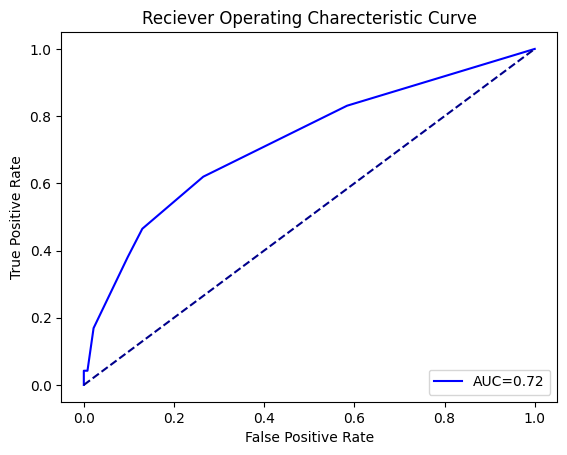

In [74]:
plotROC(roc_auc,fpr,tpr)

In [75]:
colomns=dummyx.columns

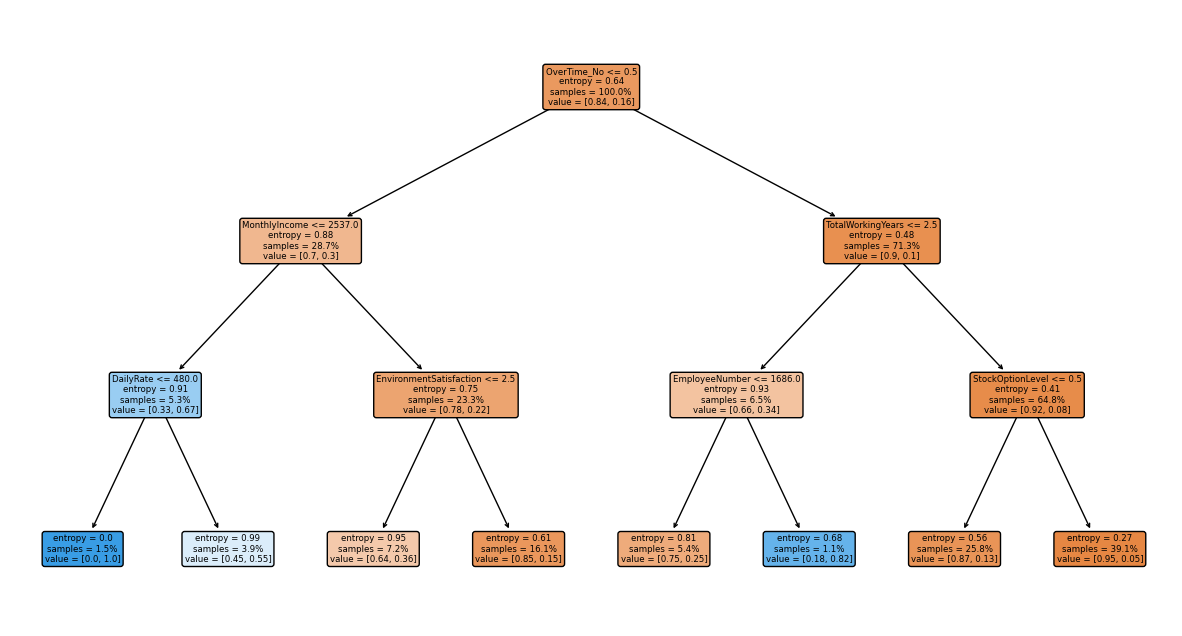

In [89]:
plt.figure(figsize=(15,8))
tree.plot_tree(model,feature_names=colomns,filled=True,precision=2,proportion=True,rounded=True)
plt.show()